In [46]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, ColumnTransformer
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *

# Palmer Penguins Modeling
Import the Palmer Penguins dataset and print out the first few rows.

In [24]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Suppose we want to predict bill_depth_mm using the other variables in the dataset.

Dummify all variables that require this.

In [25]:
ct = ColumnTransformer([("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
                                        make_column_selector(dtype_include=object))
                            ],
                                        remainder = "passthrough")

penguins_pipeline = Pipeline([
        ("preprocessing", ct)
    ])

X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

penguins_pipeline.fit(X)

transformed_x = penguins_pipeline.named_steps["preprocessing"].transform(X)
transformed_df = pd.DataFrame(transformed_x, columns=penguins_pipeline.named_steps["preprocessing"].get_feature_names_out())
transformed_df


,dummify__species_Adelie,dummify__species_Chinstrap,dummify__species_Gentoo,dummify__island_Biscoe,dummify__island_Dream,dummify__island_Torgersen,dummify__sex_female,dummify__sex_male,remainder__bill_length_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__year
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.1,181.0,3750.0,2007.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39.5,186.0,3800.0,2007.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,40.3,195.0,3250.0,2007.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,36.7,193.0,3450.0,2007.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.3,190.0,3650.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,55.8,207.0,4000.0,2009.0
329,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,43.5,202.0,3400.0,2009.0
330,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49.6,193.0,3775.0,2009.0
331,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,50.8,210.0,4100.0,2009.0


Let's use the other variables to predict bill_depth_mm. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.

Which of your models was best?

### Linear model

In [45]:

X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# fit linear model

linear_pipeline = Pipeline([
        ("preprocessing", ct),
        ("regression", LinearRegression())
    ])

linear_fitted = linear_pipeline.fit(X_train, y_train)

linear_pred_train = linear_fitted.predict(X_train)
linear_pred_test = linear_fitted.predict(X_test)

linear_mse_train = mean_squared_error(y_train, linear_pred_train)
linear_mse_test = mean_squared_error(y_test, linear_pred_test)


### kNN where k = 3

In [41]:
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit first kNN model where k = 3
knn3_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn3", KNeighborsRegressor(n_neighbors= 3))
    ])

knn3_fitted = knn3_pipeline.fit(X_train, y_train)

knn3_pred_train = knn3_fitted.predict(X_train)
knn3_pred_test = knn3_fitted.predict(X_test)

knn3_mse_train = mean_squared_error(y_train, knn3_pred_train)
knn3_mse_test = mean_squared_error(y_test, knn3_pred_test)

### kNN where k = 6

In [42]:

X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit first kNN model where k = 6
knn6_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn6", KNeighborsRegressor(n_neighbors= 6))
    ])

knn6_fitted = knn6_pipeline.fit(X_train, y_train)

knn6_pred_train = knn6_fitted.predict(X_train)
knn6_pred_test = knn6_fitted.predict(X_test)

knn6_mse_train = mean_squared_error(y_train, knn6_pred_train)
knn6_mse_test = mean_squared_error(y_test, knn6_pred_test)



### Decision Tree

In [54]:
# decision tree model

X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit first kNN model where k = 3
tree_pipeline = Pipeline([
        ("preprocessing", ct),
        ("decision_tree", DecisionTreeRegressor(random_state=1))
    ])

tree_fitted = tree_pipeline.fit(X_train, y_train)

tree_pred_train = tree_fitted.predict(X_train)
tree_pred_test = tree_fitted.predict(X_test)

tree_mse_train = mean_squared_error(y_train, tree_pred_train)
tree_mse_test = mean_squared_error(y_test, tree_pred_test)


np.float64(2.5973631840796028)

### Plot

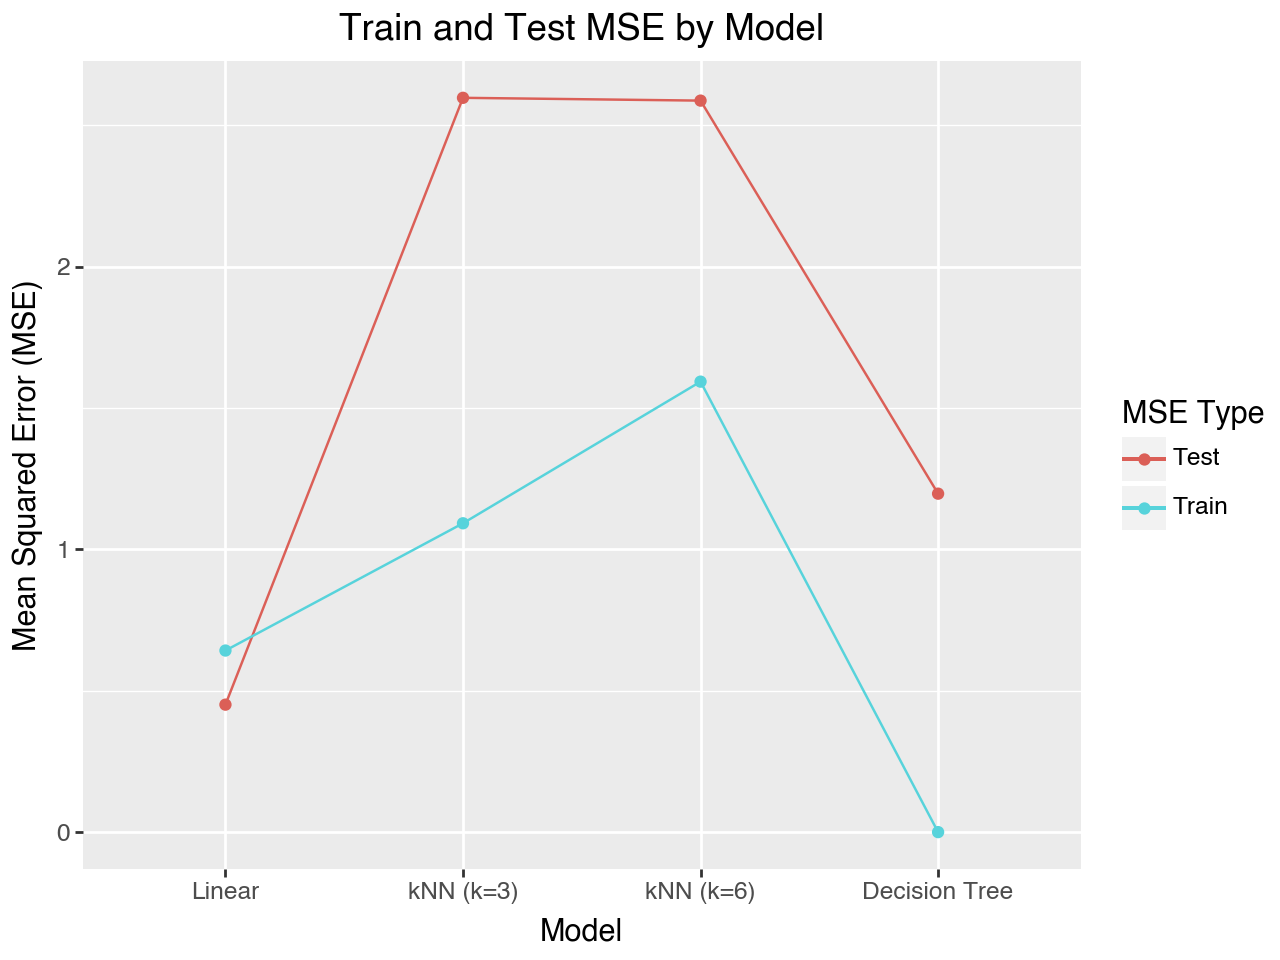

In [58]:
plot_df = pd.DataFrame({
    "Model": ["Linear", "kNN (k=3)", "kNN (k=6)", "Decision Tree"],
    "Train": [linear_mse_train, knn3_mse_train, knn6_mse_train, tree_mse_train],
    "Test": [linear_mse_test, knn3_mse_test, knn6_mse_test, tree_mse_test]
})

plot_df_long = plot_df.melt(id_vars="Model", value_vars=["Train", "Test"],
                            var_name="MSE Type", value_name="MSE")

(ggplot(plot_df_long, aes(x="Model", y="MSE", color="MSE Type", group="MSE Type")) +
    geom_line() +
    geom_point() +
    labs(title="Train and Test MSE by Model", y="Mean Squared Error (MSE)", x="Flexibility") +
    scale_x_discrete(limits=["Linear", "kNN (k=3)", "kNN (k=6)", "Decision Tree"]))


The linear model demonstrates the best performance as the training and the test MSE values are close to 0.5. The kNN model with k = 3 appears to be overfitting as it has a significantly smaller training MSE than test MSE. 